In [ ]:
import pandas as pd 
data = pd.DataFrame()   
data['population'] = [47, 48, 85, 20, 19, 13, 72, 16, 50, 60]
a_sample_without_replacement = data['population'].sample(5,replace=False)
print(a_sample_without_replacement)
# this will print 5 random values from the population without replacement

3    20
7    16
6    72
8    50
2    85
Name: population, dtype: int64


In [6]:
import pandas as pd 
data = pd.DataFrame()   
data['population'] = [47, 48, 85, 20, 19, 13, 72, 16, 50, 60]
a_sample_with_replacement = data['population'].sample(5,replace=True)
print(a_sample_with_replacement)
# this will print 5 random values from the population with replacement

0    47
9    60
0    47
8    50
0    47
Name: population, dtype: int64


In [9]:
import pandas as pd 
data = pd.DataFrame()   
data['population'] = [47, 48, 85, 20, 19, 13, 72, 16, 50, 60]
sample = data['population'].sample(10,replace=True)
a_sample_without_replacement = data['population'].sample(5,replace=False)
print('Population mean is ', data['population'].mean())
print('Population variance is ', data['population'].var(ddof=0))
print('Population standard deviation is ', data['population'].std(ddof=0))
print('Population size is ', data['population'].shape[0])
print('Sample size is ', sample.shape[0])
#this will print population statistics


Population mean is  43.0
Population variance is  571.8
Population standard deviation is  23.912339910598458
Population size is  10
Sample size is  10


In [14]:
import pandas as pd 
data = pd.DataFrame()   
data['population'] = [47, 48, 85, 20, 19, 13, 72, 16, 50, 60]
sample_length = 500

# Collection of sample variances using population variance formula (ddof=0)
sample_variance_collection0 = [data['population'].sample(50, replace=True).var(ddof=0)for i in range(sample_length)]

# Collection of sample variances using sample variance formula (ddof=1)
sample_variance_collection1 = [data['population'].sample(50, replace=True).var(ddof=1)for i in range(sample_length)]
print('population variance is ', data['population'].var(ddof=0))
print('average of sample variance with n is ', pd.Series(sample_variance_collection0).mean())
print('average of sample variance with n-1 is ', pd.Series(sample_variance_collection1).mean())
# this will print the comparison of population variance and average of sample variances


population variance is  571.8
average of sample variance with n is  559.2368448000001
average of sample variance with n-1 is  570.2203208163264


In [ ]:
import pandas as pd 
import numpy as np
data = pd.DataFrame()   
data['population'] = [47, 48, 85, 20, 19, 13, 72, 16, 50, 60]
Fstsample= pd.DataFrame(np.random.normal(10, 5, size=30))
print('sample mean is ', Fstsample[0].mean())
print('sample SD is ', Fstsample[0].std(ddof=1))
# this will print the mean and standard deviation of a random normal sample

sample mean is  10.177825683750292
sample SD is  4.602262597749379


In [ ]:
import pandas as pd 
import numpy as np
data = pd.DataFrame()   
meanlist=[]
varlist=[]
for t in range(1000):
    sample =  pd.DataFrame(np.random.normal(10, 5, size=30))
    meanlist.append(sample[0].mean())
    varlist.append(sample[0].var(ddof=1))
print('Mean of sample means is ', pd.Series(meanlist).mean())
print('Variance of sample variances is ', pd.Series(varlist).mean())
# this will print the mean of sample means and variance of sample variances

Mean of sample means is  9.985415641149105
Variance of sample variances is  24.958102682848565


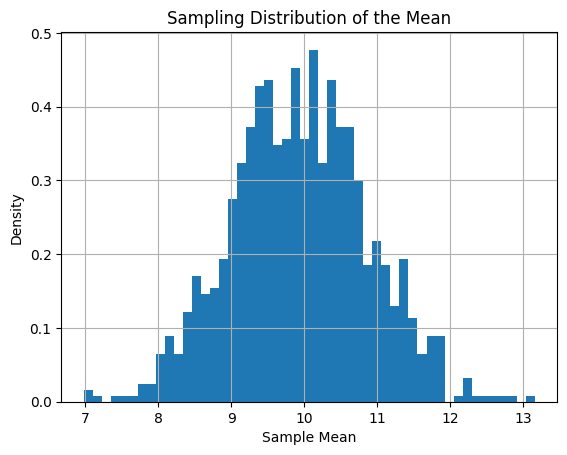

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.DataFrame()
meanlist = []
varlist = []

for t in range(1000):
    sample = pd.DataFrame(np.random.normal(10, 5, size=30))
    meanlist.append(sample[0].mean())
    varlist.append(sample[0].var(ddof=1))

# Convert meanlist to a pandas Series so .hist() works
pd.Series(meanlist).hist(bins=50, density=True)

plt.title("Sampling Distribution of the Mean")
plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.grid(True)
plt.show()


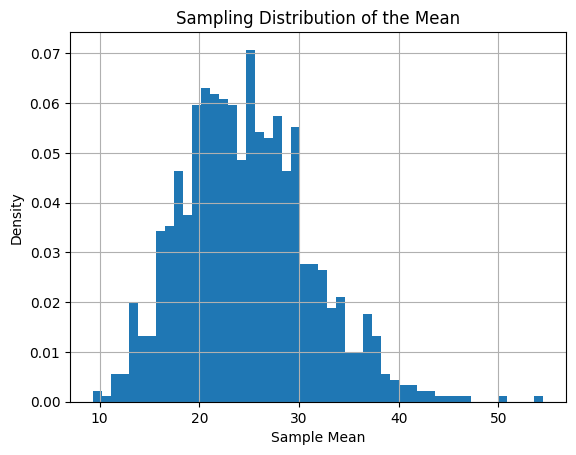

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.DataFrame()
meanlist = []
varlist = []

for t in range(1000):
    sample = pd.DataFrame(np.random.normal(10, 5, size=30))
    meanlist.append(sample[0].mean())
    varlist.append(sample[0].var(ddof=1))

# Convert meanlist to a pandas Series so .hist() works
pd.Series(varlist).hist(bins=50, density=True)

plt.title("Sampling Distribution of the Mean")
plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.grid(True)
plt.show()


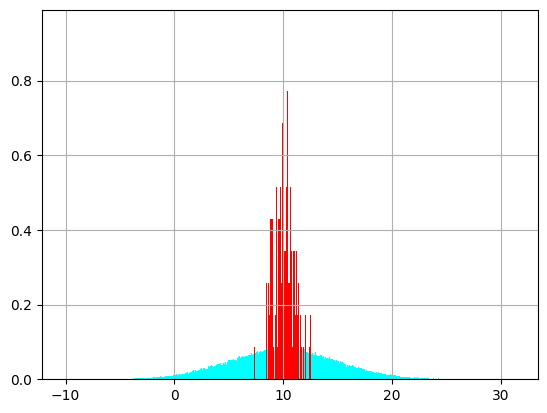

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.DataFrame()
meanlist = []
varlist = []
collection = {}

for t in range(1000):
    sample = pd.DataFrame(np.random.normal(10, 5, size=30))
    meanlist.append(sample[0].mean())
    varlist.append(sample[0].var(ddof=1))

# store results
collection['meanlist'] = meanlist

# approximate population
pop = pd.DataFrame(np.random.normal(10, 5, size=100000))

# plot
pop[0].hist(bins=500, color='cyan', density=True)
pd.Series(collection['meanlist']).hist(bins=500, density=True, color='red')

plt.show()
# this will plot the population distribution and sampling distribution of the mean by overlaying two histograms



In [ ]:
import pandas as pd
import numpy as np 
aapl= pd.read_csv('Data/apple.csv')
print(aapl.columns )
aapl ['logreturn'] = np.log(aapl['Close']/aapl['Close'].shift(-1)) - np.log(aapl['Close'])
#this will read apple stock data and compute log returns.


Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
logreturn


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
aapl = pd.read_csv('Data/apple.csv')
aapl['logReturn'] = np.log(aapl['Close'].shift(-1)) - np.log(aapl['Close'])

# values for calculating the 80% confidence interval
z_left = norm.ppf(0.1)
z_right = norm.ppf(0.9)
sample_mean = aapl['logReturn'].mean()
sample_std = aapl['logReturn'].std(ddof=1) / (aapl.shape[0] ** 0.5)
interval_left = sample_mean + z_left * sample_std
interval_right = sample_mean + z_right * sample_std

print("Sample Mean is ", sample_mean)
print("***************************************")
print("80% confidence interval is ")
print(interval_left, interval_right)
#this code will compute the 80% confidence interval for the mean of apple log returns



Sample Mean is  0.0007011770831249285
***************************************
80% confidence interval is 
0.000363346615649743 0.0010390075506001139


         Date     Close      High       Low      Open     Volume
0  12/12/1980  0.098389  0.098817  0.098389  0.098389  469033600
1  15/12/1980  0.093256  0.093684  0.093256  0.093684  175884800
2  16/12/1980  0.086412  0.086839  0.086412  0.086839  105728000
3  17/12/1980  0.088550  0.088978  0.088550  0.088550   86441600
4  18/12/1980  0.091118  0.091545  0.091118  0.091118   73449600
             Date       Close        High         Low        Open    Volume
11333  01/12/2025  283.100006  283.420013  276.140015  278.010010  46587700
11334  02/12/2025  286.190002  287.399994  282.630005  283.000000  53669500
11335  03/12/2025  284.149994  288.619995  283.299988  286.200012  43538700
11336  04/12/2025  280.700012  284.730011  278.589996  284.100006  43989100
11337  05/12/2025  278.779999  281.140015  278.049988  280.540009  47244000
(11338, 6)


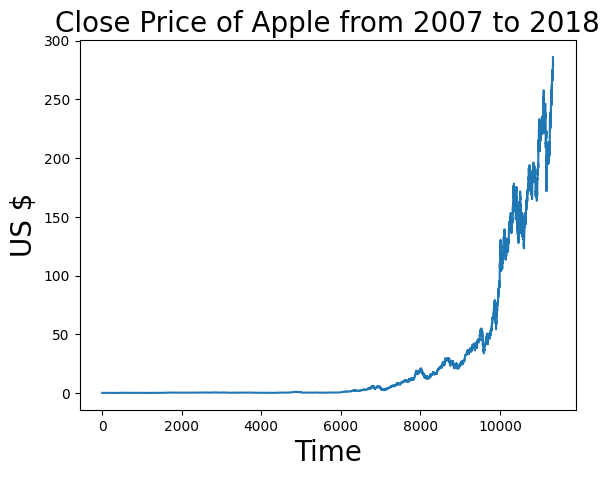

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
aapl = pd.read_csv('Data/apple.csv')

plt.title("Close Price of Apple from 2007 to 2018", size=20)
plt.xlabel("Time", size=20)
plt.ylabel("US $", size=20)
plt.plot(aapl.loc[:, 'Close'])
# this will plot the close price of apple from 2007 to 2018

print(aapl.head())
print(aapl.tail())
print(aapl.shape)
#this is to test the data read from csv file
